I want to take a look at the three transactions data sets and see what the difference is between them.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import seaborn as sns


%matplotlib inline
plt.style.use('seaborn-dark')

In [3]:
%ls data | grep transaction

ls: data: No such file or directory


In [7]:
transactions = pd.read_csv(
    '../data/transaction_items_full_clean.csv', 
    delimiter=","
)
transactions["Time"] = pd.to_datetime(transactions["Time"])
print(transactions.shape)
transactions.head(3)

(26748, 21)


,Unnamed: 0,Time,Register Name/Number,Operation Type,Store Code,UPC,Line Item,Department,Supplier,Supplier Code,...,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Transaction ID,Customer ID
0,0,2020-01-01 02:04:00,Register 1,SALE,*400000000015,*,Misc Taxable,general,not tracked,NaN,...,33.0,1.0,0.0,33.0,0.0,33.0,0.0,33.0,B5B298C8-88CD-451D-8ED2-AD3DC5386B9B,48373875
1,1,2020-01-01 01:51:00,Register 1,SALE,*400000000060,*,Landlocked IPA,beers,not tracked,NaN,...,5.0,4.0,0.0,20.0,0.0,20.0,0.0,20.0,0FF4F15F-89FB-4F93-B4E5-04EB5B61BDC2,13685111
2,2,2020-01-01 01:49:00,Register 1,SALE,*400000000060,*,Landlocked IPA,beers,not tracked,NaN,...,5.0,1.0,-2.5,2.5,2.5,0.0,0.0,0.0,C6BADA76-ED6A-4551-BDAA-292CF65F0939,13685111


[]

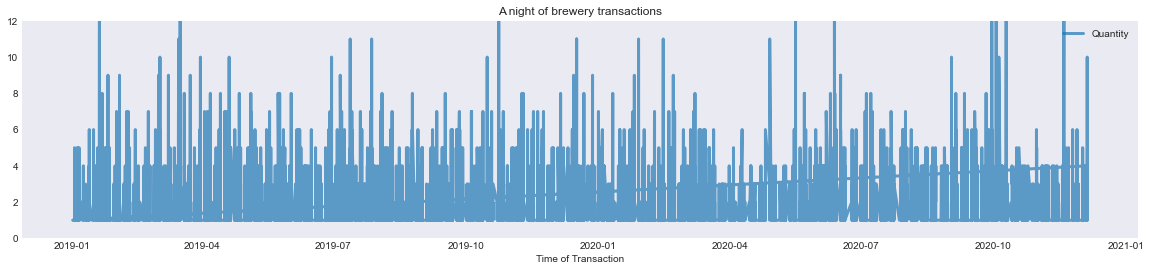

In [8]:
fig, ax = plt.subplots(1,1, figsize=(20,4))

# ax.plot(transactions["Time"], transactions["Price"], label="Prices",  linewidth=3, alpha=.7)
# ax.plot(transactions["Time"], transactions["Discounts"], label="Discounts", linewidth=3, alpha=.7)
ax.plot(transactions["Time"], transactions["Quantity"], label="Quantity", linewidth=3, alpha=.7)

ax.grid(False)
ax.set_title("A night of brewery transactions")
ax.legend()
ax.set_xlabel("Time of Transaction")
ax.set_ylim(0,12)
ax.plot()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,6))

for item in transactions["Line Item"].unique():
    this_item = transactions[transactions["Line Item"]==item]
    ax.bar(this_item["Time"], this_item["Quantity"], label=item, linewidth=1, alpha=.3, width=1)    
    
ax.grid(False)
ax.set_title("A night of brewery item sales")
# Too many items for a legend
# ax.legend()
ax.set_ylim(0,10)
ax.set_xlabel("Time of Transaction")
ax.plot()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,6))

for item in transactions["Department"].unique():
    this_item = transactions[transactions["Department"]==item]
    ax.bar(this_item["Time"], this_item["Quantity"], label=item, linewidth=1, alpha=.9, width=.3)    
    
ax.grid(False)
ax.set_title("A night of brewery item sales")
ax.legend()
ax.set_ylim(0,10)
ax.set_xlabel("Time of Transaction")
ax.plot()

In [ ]:
transactions.groupby("Department").sum()

In [ ]:
transactions.groupby("Line Item").sum()